In [27]:
# Install modules
!pip install pandas matplotlib numpy

In [28]:
#Import modules
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [29]:
# Load SQL master table into python
db_path = r'../db/energy.sqlite'
connect = sqlite3.connect(db_path)

df = pd.read_sql_query("SELECT * FROM master WHERE year >= 1950 AND year < 2024;", connect)

connect.close()

df.head()

,country,iso_code,year,primary_energy_consumption,energy_per_capita,electricity_demand,renewables_share_energy,fossil_share_energy,solar_share_elec,wind_share_elec,co2,co2_per_capita,gdp_per_capita
0,Afghanistan,AFG,1950,,,,,,,,0.08427199721336365,0.010837197303771973,None
1,Afghanistan,AFG,1951,,,,,,,,0.09160000085830688,0.011625334620475769,None
2,Afghanistan,AFG,1952,,,,,,,,0.09160000085830688,0.01146751083433628,None
3,Afghanistan,AFG,1953,,,,,,,,0.10625600069761276,0.013123366050422192,None
4,Afghanistan,AFG,1954,,,,,,,,0.10625600069761276,0.012945491820573807,None


In [30]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11745 entries, 0 to 11744
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     11745 non-null  object
 1   iso_code                    11745 non-null  object
 2   year                        11745 non-null  object
 3   primary_energy_consumption  11745 non-null  object
 4   energy_per_capita           11745 non-null  object
 5   electricity_demand          11745 non-null  object
 6   renewables_share_energy     11745 non-null  object
 7   fossil_share_energy         11745 non-null  object
 8   solar_share_elec            11745 non-null  object
 9   wind_share_elec             11745 non-null  object
 10  co2                         11745 non-null  object
 11  co2_per_capita              11745 non-null  object
 12  gdp_per_capita              6328 non-null   object
dtypes: object(13)
memory usage: 1.2+ MB


In [31]:
# Change datatypes
df[["country", "iso_code"]] = df[["country", "iso_code"]].astype(str)
df["year"] = df["year"].astype(int)

# Change all columns of interest to float
cols = [
    "renewables_share_energy","fossil_share_energy","co2_per_capita",
    "primary_energy_consumption","energy_per_capita","electricity_demand","gdp_per_capita",
    "solar_share_elec","wind_share_elec","co2"
]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

In [32]:
# Check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11745 entries, 0 to 11744
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     11745 non-null  object 
 1   iso_code                    11745 non-null  object 
 2   year                        11745 non-null  int32  
 3   primary_energy_consumption  9704 non-null   float64
 4   energy_per_capita           9660 non-null   float64
 5   electricity_demand          5123 non-null   float64
 6   renewables_share_energy     4380 non-null   float64
 7   fossil_share_energy         4380 non-null   float64
 8   solar_share_elec            5954 non-null   float64
 9   wind_share_elec             5834 non-null   float64
 10  co2                         11647 non-null  float64
 11  co2_per_capita              11610 non-null  float64
 12  gdp_per_capita              6328 non-null   float64
dtypes: float64(10), int32(1), objec

In [33]:
# Check shape, unique columns and range
print("rows, cols:", df.shape)
print("unique countries:", df['iso_code'].nunique())
print("year range:", df['year'].min(), "->", df["year"].max())

rows, cols: (11745, 13)
unique countries: 206
year range: 1950 -> 2023


In [34]:
# Change empty values in the data to missing (None) values
df[cols] = df[cols].replace(r"^\s*$", np.nan, regex=True)

# Calculate missing values
missing = df[cols].isna().sum()
print("\nMissing:")
print(missing)


Missing:
renewables_share_energy       7365
fossil_share_energy           7365
co2_per_capita                 135
primary_energy_consumption    2041
energy_per_capita             2085
electricity_demand            6622
gdp_per_capita                5417
solar_share_elec              5791
wind_share_elec               5911
co2                             98
dtype: int64


In [35]:
# Calculate percentage missing
missing_pct = (df[cols].isna().mean() * 100).round(2).sort_values(ascending=False)
print("\nPercentage missing:")
print(missing_pct)


Percentage missing:
renewables_share_energy       62.71
fossil_share_energy           62.71
electricity_demand            56.38
wind_share_elec               50.33
solar_share_elec              49.31
gdp_per_capita                46.12
energy_per_capita             17.75
primary_energy_consumption    17.38
co2_per_capita                 1.15
co2                            0.83
dtype: float64


In [36]:
# Check for duplicates in the data
dups = df.duplicated(["iso_code", "year"]).sum()
print("Duplicates:", dups)

Duplicates: 0


In [37]:
global_year = df.groupby('year')[
    cols
].mean().reset_index()


global_year.head()

,year,renewables_share_energy,fossil_share_energy,co2_per_capita,primary_energy_consumption,energy_per_capita,electricity_demand,gdp_per_capita,solar_share_elec,wind_share_elec,co2
0,1950,NaN,NaN,2.148370,NaN,NaN,NaN,NaN,NaN,NaN,57.537989
1,1951,NaN,NaN,2.193194,NaN,NaN,NaN,NaN,NaN,NaN,61.665495
2,1952,NaN,NaN,2.124754,NaN,NaN,NaN,NaN,NaN,NaN,62.075552
3,1953,NaN,NaN,2.176920,NaN,NaN,NaN,NaN,NaN,NaN,63.621816
4,1954,NaN,NaN,2.409900,NaN,NaN,NaN,NaN,NaN,NaN,64.205088


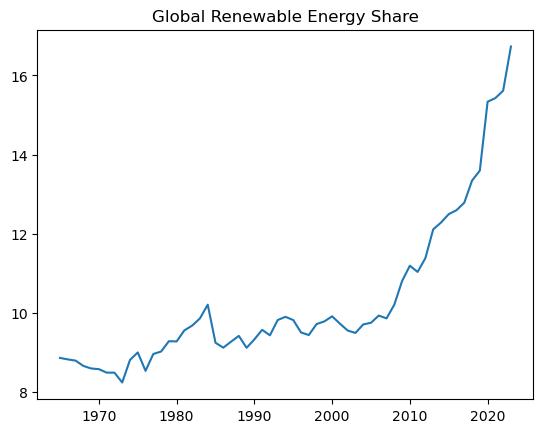

In [38]:
plt.plot(global_year['year'], global_year[cols[0]])
plt.title("Global Renewable Energy Share")
plt.show()

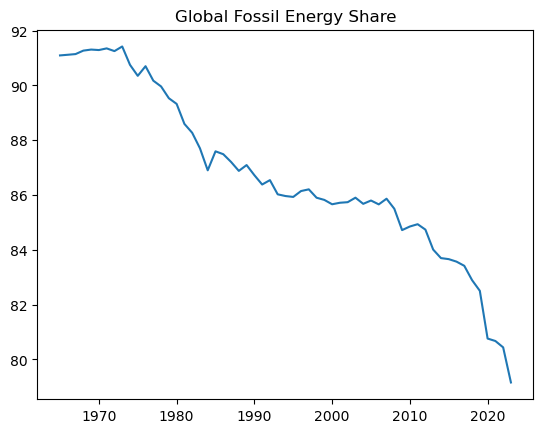

In [39]:
plt.plot(global_year['year'], global_year[cols[1]])
plt.title("Global Fossil Energy Share")
plt.show()

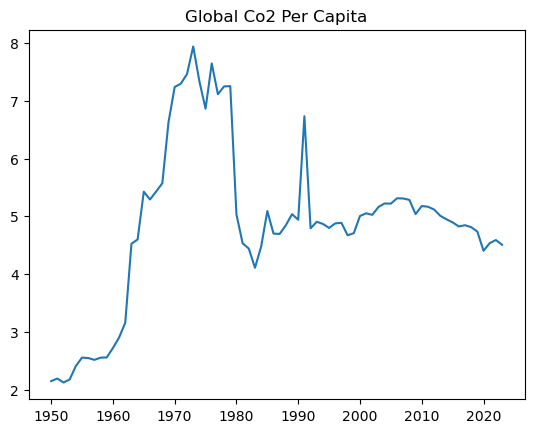

In [40]:
plt.plot(global_year['year'], global_year[cols[2]])
plt.title("Global Co2 Per Capita")
plt.show()

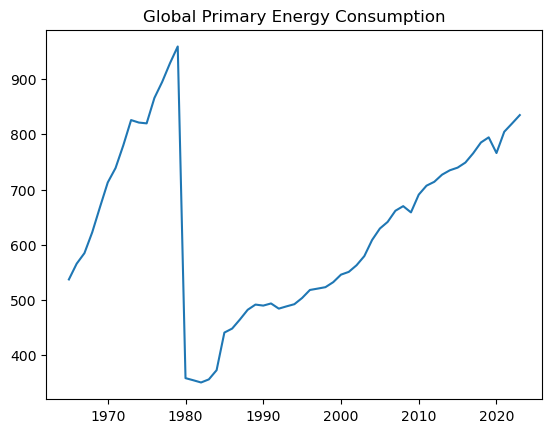

In [41]:
plt.plot(global_year['year'], global_year[cols[3]])
plt.title("Global Primary Energy Consumption")
plt.show()

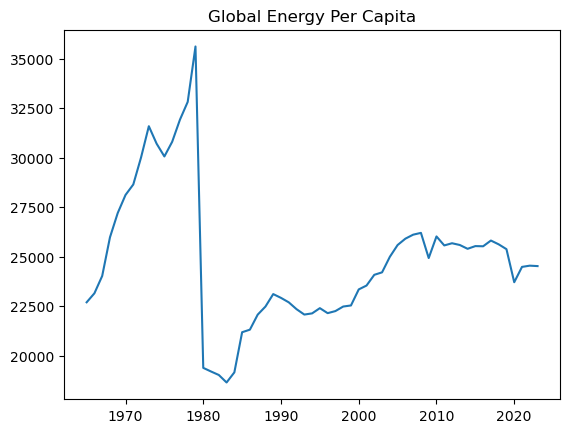

In [42]:
plt.plot(global_year['year'], global_year[cols[4]])
plt.title("Global Energy Per Capita")
plt.show()

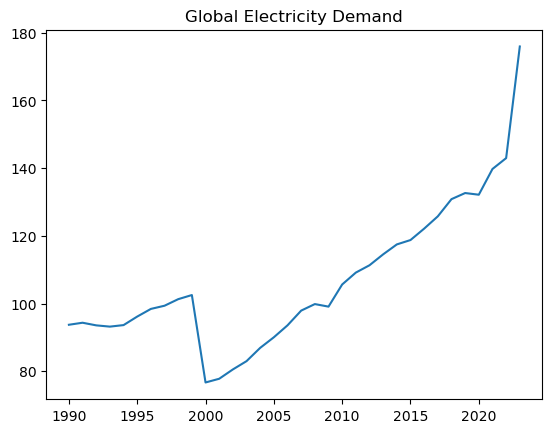

In [43]:
plt.plot(global_year['year'], global_year[cols[5]])
plt.title("Global Electricity Demand")
plt.show()

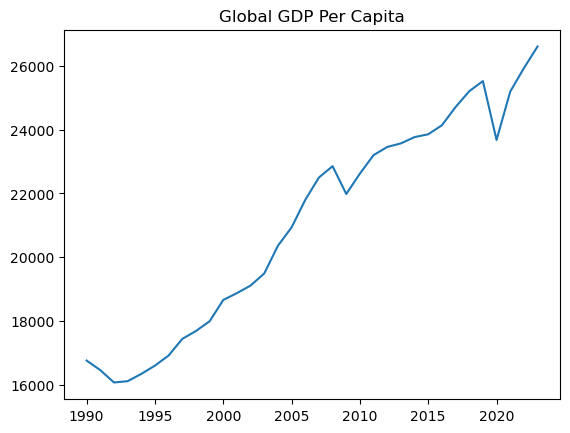

In [44]:
plt.plot(global_year['year'], global_year[cols[6]])
plt.title("Global GDP Per Capita")
plt.show()

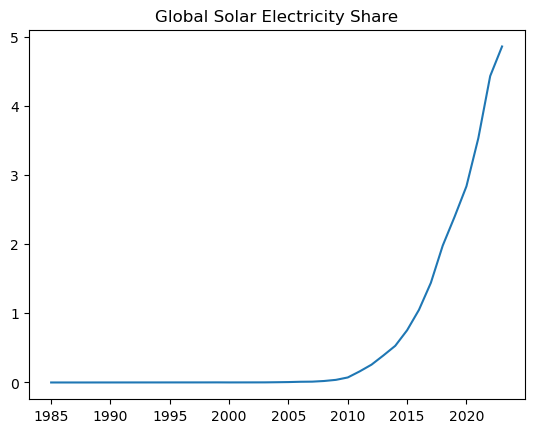

In [45]:
plt.plot(global_year['year'], global_year[cols[7]])
plt.title("Global Solar Electricity Share")
plt.show()

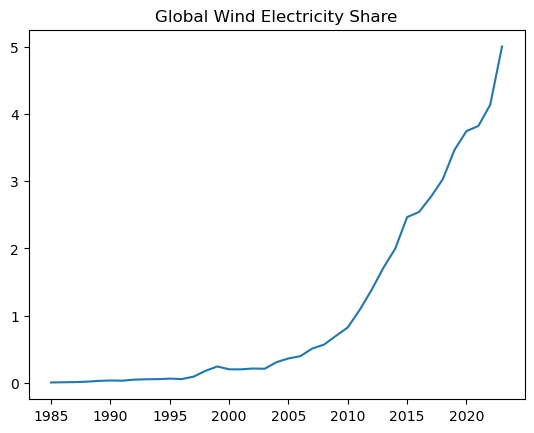

In [46]:
plt.plot(global_year['year'], global_year[cols[8]])
plt.title("Global Wind Electricity Share")
plt.show()

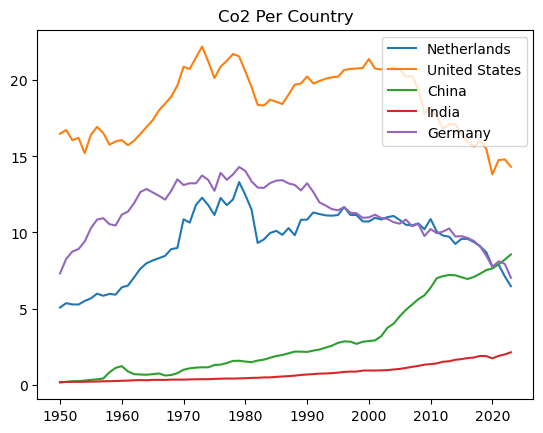

In [53]:
# inspect trends in data
countries = ["Netherlands", "United States", "China", "India", "Germany"]

for c in countries:
    sub = df[df["country"] == c]
    plt.plot(sub["year"], sub[cols[2]], label=c)
plt.title("Co2 Per Country")
plt.legend()
plt.show()

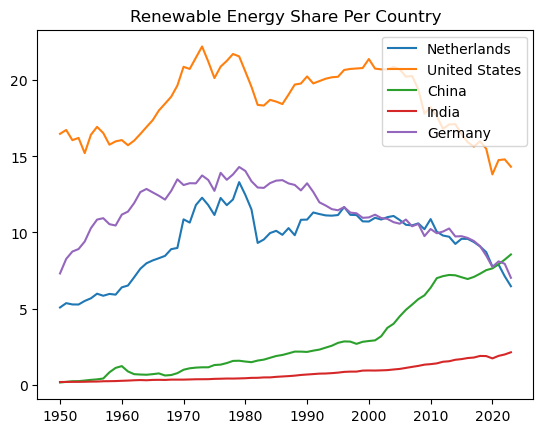

In [52]:
for c in countries:
    sub = df[df["country"] == c]
    plt.plot(sub["year"], sub[cols[2]], label=c)
plt.title("Renewable Energy Share Per Country")
plt.legend()
plt.show()

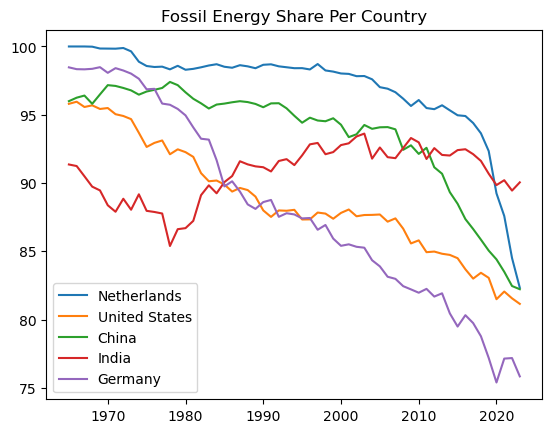

In [54]:
for c in countries:
    sub = df[df["country"] == c]
    plt.plot(sub["year"], sub[cols[1]], label=c)
plt.title("Fossil Energy Share Per Country")
plt.legend()
plt.show()

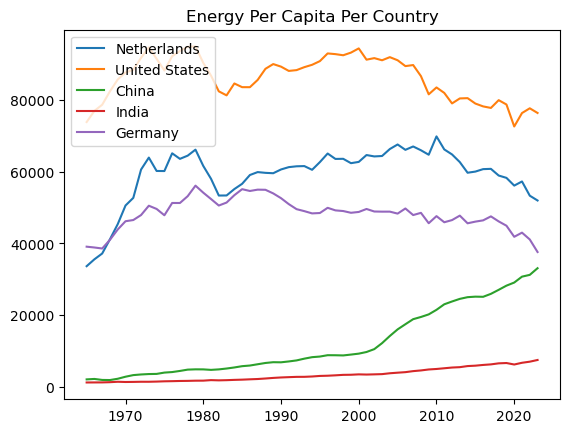

In [55]:
for c in countries:
    sub = df[df["country"] == c]
    plt.plot(sub["year"], sub[cols[4]], label=c)
plt.title("Energy Per Capita Per Country")
plt.legend()
plt.show()

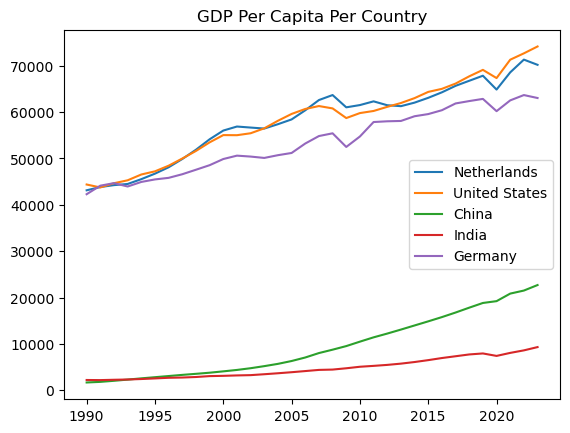

In [56]:
for c in countries:
    sub = df[df["country"] == c]
    plt.plot(sub["year"], sub[cols[6]], label=c)
plt.title("GDP Per Capita Per Country")
plt.legend()
plt.show()

In [ ]:
# Save data to csv and parquet

df.to_csv("../data/final_df.csv", index=False)
df.to_parquet("../data/final_df.parquet")